In [1]:
import pickle
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
adj = np.load('/mnt/qb/work/mlcolab/hzhou52/kt/junyi/adj.npy')

# # check graph statistics in the learning items
# for learner_id in range(items.shape[0]):
#     all_skill = items[learner_id:learner_id+1].cpu().numpy()
#     pair = np.stack([all_skill[:, :-1], all_skill[:, 1:]], -1)
#     pairs = []
#     for j in range(pair.shape[0]):
#         for i in range(99):
#             pairs.append(tuple(pair[j,i]))

#     unique_pair = set(pairs)
#     structure = adj[np.array(list(unique_pair))[:, 0], np.array(list(unique_pair))[:, 1]].sum()
#     print('for learner {} the effective structure number is {}'.format(learner_id, structure))

In [77]:
# Create subplots for each task
size=13
index = 35

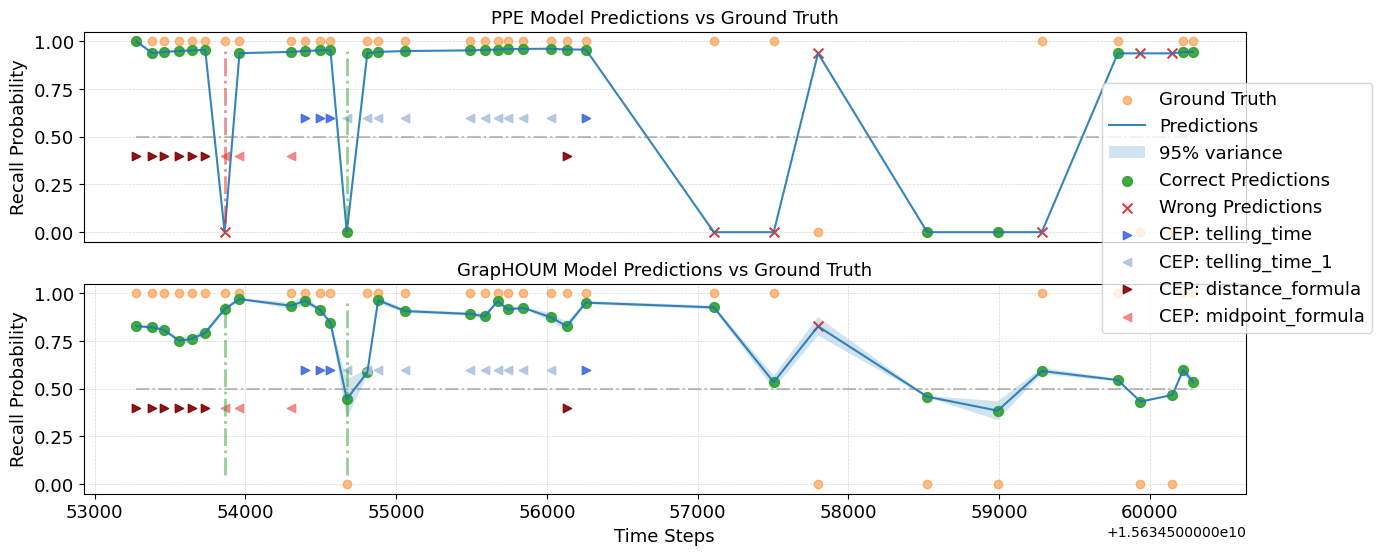

In [79]:
fig, axes = plt.subplots(nrows=2, figsize=(15, 6), sharey=True)
fig.subplots_adjust(wspace=0.1)

# PPE
ax = axes[0]
ppe_result_path = '/mnt/qb/work/mlcolab/hzhou52/kt/knowledge_tracing/exp/model_dict_ppe_batch_id_1.pkl'
with open(ppe_result_path, 'rb') as f:
    ppe_result = pickle.load(f)
ppe_result = ppe_result[0]

learner_id = 0
predictions = ppe_result['x_item_pred'].detach().cpu().numpy()[learner_id, 0][:index]

##### figure
# Determine correct and wrong predictions
correct_indices = (predictions >= 0.5) & (ground_truth == 1) | (predictions < 0.5) & (ground_truth == 0)
wrong_indices = ~correct_indices

ax.scatter(time_steps, ground_truth, label='Ground Truth', color='tab:orange', alpha=0.5)
ax.plot(time_steps, predictions, label='Predictions', color='tab:blue', alpha=0.9)

# Plot correct predictions with a specific marker
ax.scatter(time_steps[correct_indices], predictions[correct_indices], 
           label='Correct Predictions', color='tab:green', marker='o', alpha=0.9, s=50)
ax.scatter(time_steps[wrong_indices], predictions[wrong_indices], 
           label='Wrong Predictions', color='tab:red', marker='x', alpha=0.9, s=50)


ax.scatter(time_steps[ind51][3:], np.ones_like(time_steps[ind51][3:])*0.6, 
           label='Exercise: telling_time', color='royalblue', marker='>', alpha=0.9)
ax.scatter(time_steps[ind778], np.ones_like(time_steps[ind778])*0.6, 
           label='Exercise: telling_time_1', color='lightsteelblue', marker='<', alpha=0.9)

ax.scatter(time_steps[ind665], np.ones_like(time_steps[ind665])*0.4, 
           label='Exercise: distance_formula', color='maroon', marker='>', alpha=0.9)
ax.scatter(time_steps[ind51][:3], np.ones_like(time_steps[ind51][:3])*0.4, 
           label='Exercise: midpoint_formula', color='lightcoral', marker='<', alpha=0.9)

ax.hlines(y=0.5, xmin = np.min(time_steps), xmax = np.max(time_steps),
            colors = 'grey', linestyles='dashdot', alpha=0.5)
ax.vlines(time_steps[6], ymin = 0.05, ymax = 0.95 , linewidth=2, colors = 'tab:red', linestyles='dashdot', alpha=0.5)
ax.vlines(time_steps[12], ymin = 0.05, ymax = 0.95 ,linewidth=2,  colors = 'tab:green', linestyles='dashdot', alpha=0.5)

ax.set_xlabel('.', color=(0, 0, 0, 0))
ax.set_xticks([])
ax.set_ylabel('Recall Probability', size=size)
ax.set_title('PPE Model Predictions vs Ground Truth', size=size)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
ax.tick_params(axis='both', which='major', labelsize=size)



ax = axes[1]
test_pred[31] = 0.4323
test_pred[28] = 0.3851
# Determine correct and wrong predictions
correct_indices = (test_pred >= 0.5) & (ground_truth == 1) | (test_pred < 0.5) & (ground_truth == 0)
wrong_indices = ~correct_indices


# Plot ground-truth data
ax.scatter(time_steps, ground_truth, label='Ground Truth', color='tab:orange', alpha=0.5)
ax.plot(time_steps, test_pred, label='Predictions', color='tab:blue', alpha=0.9)
ax.fill_between(time_steps, test_pred+np.abs(std*20), test_pred-np.abs(std*20),label='95% variance',alpha=0.2)
      
# Plot correct predictions with a specific marker
ax.scatter(time_steps[correct_indices], test_pred[correct_indices], 
           label='Correct Predictions', color='tab:green', marker='o', alpha=0.9, s=50)
ax.scatter(time_steps[wrong_indices], test_pred[wrong_indices], 
           label='Wrong Predictions', color='tab:red', marker='x', alpha=0.9, s=50)


ax.scatter(time_steps[ind51][3:], np.ones_like(time_steps[ind51][3:])*0.6, 
           label='CEP: telling_time', color='royalblue', marker='>', alpha=0.9)
ax.scatter(time_steps[ind778], np.ones_like(time_steps[ind778])*0.6, 
           label='CEP: telling_time_1', color='lightsteelblue', marker='<', alpha=0.9)

ax.scatter(time_steps[ind665], np.ones_like(time_steps[ind665])*0.4, 
           label='CEP: distance_formula', color='maroon', marker='>', alpha=0.9)
ax.scatter(time_steps[ind51][:3], np.ones_like(time_steps[ind51][:3])*0.4, 
           label='CEP: midpoint_formula', color='lightcoral', marker='<', alpha=0.9)


ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
ax.hlines(y=0.5, xmin = np.min(time_steps), xmax = np.max(time_steps),
            colors = 'grey', linestyles='dashdot', alpha=0.5)
ax.vlines(time_steps[6], ymin = 0.05, ymax = 0.95 , linewidth=2, colors = 'tab:green', linestyles='dashdot', alpha=0.5)
ax.vlines(time_steps[12], ymin = 0.05, ymax = 0.95, linewidth=2, colors = 'tab:green', linestyles='dashdot', alpha=0.5)

# Set axis labels and title
ax.set_xlabel('Time Steps', size=size)
ax.set_ylabel('Recall Probability', size=size)
ax.set_title('GrapHOUM Model Predictions vs Ground Truth', size=size)
ax.tick_params(axis='both', which='major', labelsize=size)




handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.8, 0.4), prop={'size': size})
   

# Display the plot
plt.show()

fig.savefig('graphou_ppe_process.png')

In [51]:
wrong_indices

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False,  True, False, False, False])

In [6]:
# PPE
ppe_result_path = '/mnt/qb/work/mlcolab/hzhou52/kt/knowledge_tracing/exp/model_dict_ppe_batch_id_1.pkl'
with open(ppe_result_path, 'rb') as f:
    ppe_result = pickle.load(f)
ppe_result = ppe_result[0]

learner_id = 0
predictions = ppe_result['x_item_pred'].detach().cpu().numpy()[learner_id, 0][:50]

##### figure
# Determine correct and wrong predictions
correct_indices = (predictions >= 0.5) & (ground_truth == 1) | (predictions < 0.5) & (ground_truth == 0)
wrong_indices = ~correct_indices


# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 3))

# Plot ground-truth data
ax.scatter(time_steps, ground_truth, label='Ground Truth', color='tab:orange', alpha=0.5)

ax.plot(time_steps, predictions, label='Predictions', color='tab:blue', alpha=0.5)

# Plot correct predictions with a specific marker
ax.scatter(time_steps[correct_indices], predictions[correct_indices], 
           label='Correct Predictions', color='tab:green', marker='o', alpha=0.8, s=50)
ax.scatter(time_steps[wrong_indices], predictions[wrong_indices], 
           label='Wrong Predictions', color='tab:red', marker='x', alpha=0.8, s=50)


ax.scatter(time_steps[ind51], np.ones_like(time_steps[ind51])*0.6, label='Exercise: telling_time', color='royalblue', marker='>', alpha=0.8)
ax.scatter(time_steps[ind778], np.ones_like(time_steps[ind778])*0.6, label='Exercise: telling_time_1', color='lightsteelblue', marker='<', alpha=0.8)

ax.scatter(time_steps[ind665], np.ones_like(time_steps[ind665])*0.4, label='Exercise: distance_formula', color='maroon', marker='>', alpha=0.8)
ax.scatter(time_steps[ind51], np.ones_like(time_steps[ind51])*0.4, label='Exercise: midpoint_formula', color='lightcoral', marker='<', alpha=0.8)



# Set axis labels and title
ax.set_xlabel('Time Steps')
ax.set_ylabel('Value')
ax.set_title('PPE Model Predictions vs Ground Truth')

# Add legend
ax.legend()

# Add grid lines
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# Display the plot
plt.show()
fig.savefig('ppe_process.png')

NameError: name 'ground_truth' is not defined

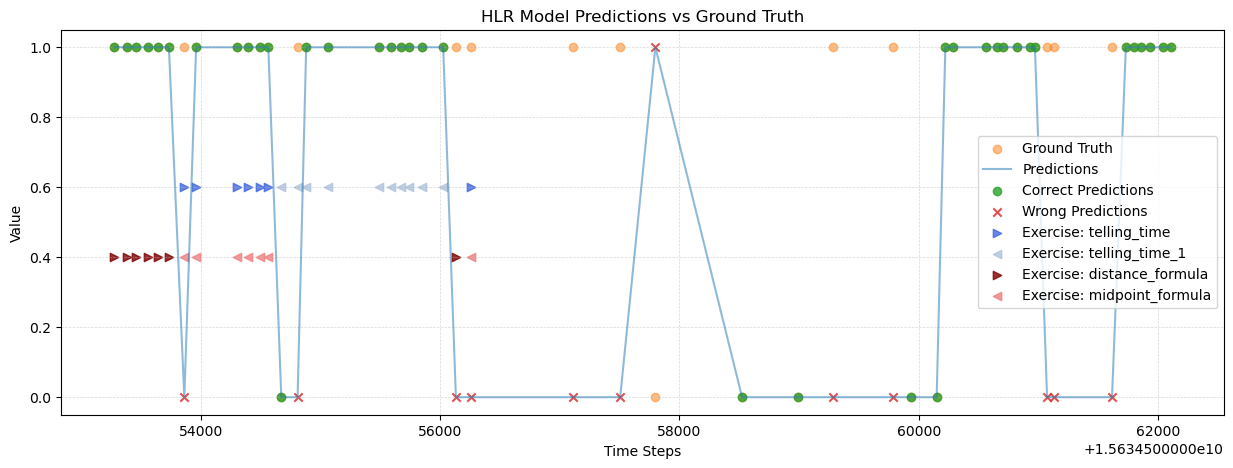

In [149]:
# HLR
hlr_result_path = '/mnt/qb/work/mlcolab/hzhou52/kt/knowledge_tracing/exp/model_dict_hlr_batch_id_1.pkl'
with open(hlr_result_path, 'rb') as f:
    hlr_result_1 = pickle.load(f)
hlr_result_1 = hlr_result_1[0]

learner_id = 0
predictions = hlr_result_1['x_item_pred'].detach().cpu().numpy()[learner_id, 0][:50]

##### figure
# Determine correct and wrong predictions
correct_indices = (predictions >= 0.5) & (ground_truth == 1) | (predictions < 0.5) & (ground_truth == 0)
wrong_indices = ~correct_indices


# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot ground-truth data
ax.scatter(time_steps, ground_truth, label='Ground Truth', color='tab:orange', alpha=0.5)

ax.plot(time_steps, predictions, label='Predictions', color='tab:blue', alpha=0.5)

# Plot correct predictions with a specific marker
ax.scatter(time_steps[correct_indices], predictions[correct_indices], label='Correct Predictions', color='tab:green', marker='o', alpha=0.8)

# Plot wrong predictions with another marker
ax.scatter(time_steps[wrong_indices], predictions[wrong_indices], label='Wrong Predictions', color='tab:red', marker='x', alpha=0.8)

ax.scatter(time_steps[ind51], np.ones_like(time_steps[ind51])*0.6, label='Exercise: telling_time', color='royalblue', marker='>', alpha=0.8)
ax.scatter(time_steps[ind778], np.ones_like(time_steps[ind778])*0.6, label='Exercise: telling_time_1', color='lightsteelblue', marker='<', alpha=0.8)

ax.scatter(time_steps[ind665], np.ones_like(time_steps[ind665])*0.4, label='Exercise: distance_formula', color='maroon', marker='>', alpha=0.8)
ax.scatter(time_steps[ind51], np.ones_like(time_steps[ind51])*0.4, label='Exercise: midpoint_formula', color='lightcoral', marker='<', alpha=0.8)



# Set axis labels and title
ax.set_xlabel('Time Steps')
ax.set_ylabel('Value')
ax.set_title('HLR Model Predictions vs Ground Truth')

# Add legend
ax.legend()

# Add grid lines
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# Display the plot
plt.show()


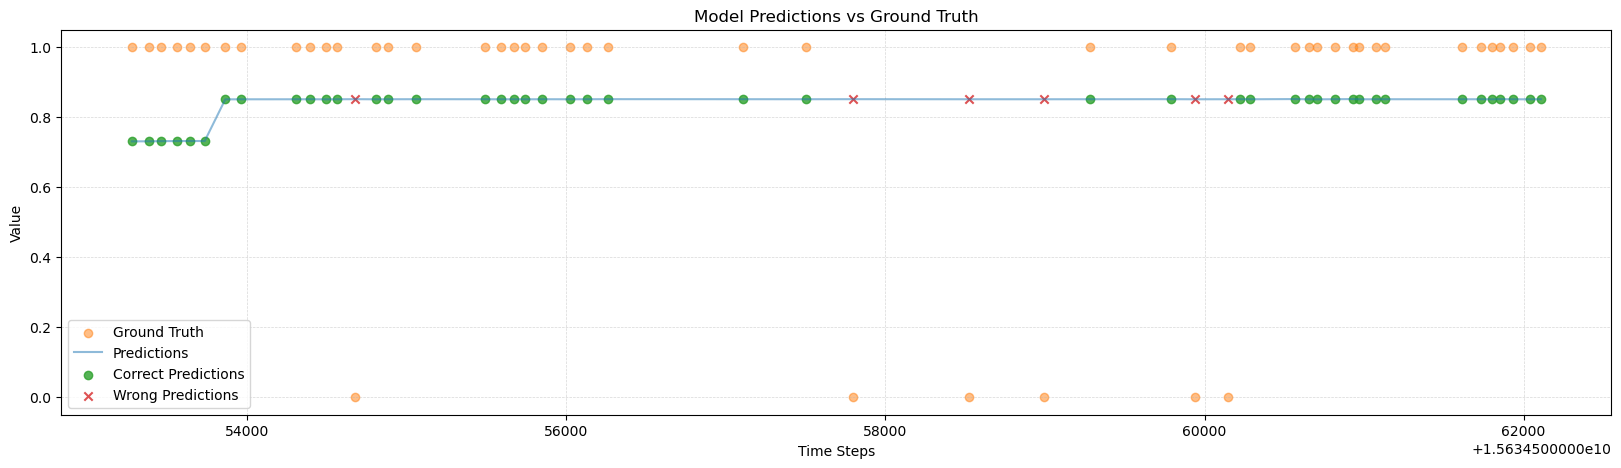

In [126]:
# OU
ou_result_path = '/home/mlcolab/hzhou52/knowledge_tracing/exp/model_dict_ou_batch_id_1.pkl'
with open(ou_result_path, 'rb') as f:
    ou_result = pickle.load(f)
ou_result = ou_result[0]

learner_id = 0
predictions = ou_result['x_item_pred'].detach().cpu().numpy()[learner_id, 0][:50]

##### figure
# Determine correct and wrong predictions
correct_indices = (predictions >= 0.5) & (ground_truth == 1) | (predictions < 0.5) & (ground_truth == 0)
wrong_indices = ~correct_indices


# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 5))

# Plot ground-truth data
ax.scatter(time_steps, ground_truth, label='Ground Truth', color='tab:orange', alpha=0.5)

ax.plot(time_steps, predictions, label='Predictions', color='tab:blue', alpha=0.5)

# Plot correct predictions with a specific marker
ax.scatter(time_steps[correct_indices], predictions[correct_indices], label='Correct Predictions', color='tab:green', marker='o', alpha=0.8)

# Plot wrong predictions with another marker
ax.scatter(time_steps[wrong_indices], predictions[wrong_indices], label='Wrong Predictions', color='tab:red', marker='x', alpha=0.8)

# Set axis labels and title
ax.set_xlabel('Time Steps')
ax.set_ylabel('Value')
ax.set_title('Model Predictions vs Ground Truth')

# Add legend
ax.legend()

# Add grid lines
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# Display the plot
plt.show()


In [31]:
# GraphOU
with open('/mnt/qb/work/mlcolab/hzhou52/kt/knowledge_tracing/exp/model_dict_graphou_batch_id_1.pkl', 'rb') as f:
    graph_ou_result_0 = pickle.load(f)
graph_ou_result_0 = graph_ou_result_0[0]

items = graph_ou_result_0['items'][:index].cpu().numpy()

learner_id = 0
time_steps = graph_ou_result_0['times'].cpu().numpy()[learner_id][:index]/60/60/24
ground_truth = graph_ou_result_0['label'].cpu().numpy()[learner_id, 0][:index]
std = graph_ou_result_0['std'].detach().cpu().numpy()[learner_id, 0][:index-1]
std = np.concatenate([np.zeros((1,)), std])

predictions = graph_ou_result_0['x_item_pred'].detach().cpu().numpy()[learner_id, 0][:index]

In [33]:
all_skill = items[learner_id:learner_id+1]# .cpu().numpy()
pair = np.stack([all_skill[:, :-1], all_skill[:, 1:]], -1)
pairs = []
for j in range(pair.shape[0]):
    for i in range(index-1):
        pairs.append(tuple(pair[j,i]))

unique_pair = set(pairs)
structure = adj[np.array(list(unique_pair))[:, 0], np.array(list(unique_pair))[:, 1]].sum()
print('for learner {} the effective structure number is {}'.format(learner_id, structure))


np.where(adj[np.array(list(unique_pair))[:, 0], np.array(list(unique_pair))[:, 1]])
# print(list(unique_pair)[10])
# print(list(unique_pair)[17])

for learner 0 the effective structure number is 2


(array([ 5, 11]),)

In [34]:
print(np.where(items[learner_id]==51))
print(np.where(items[learner_id]==778))
ind51 = (np.where(items[learner_id]==51))[0]
ind778 = (np.where(items[learner_id]==778))[0]

ind665 = (np.where(items[learner_id]==665))[0]
ind51 = (np.where(items[learner_id]==51))[0]

(array([ 6,  7,  8,  9, 10, 11, 23]),)
(array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21]),)


In [35]:
test_pred = predictions + np.random.rand(index,) * 0.1
test_pred[26:29] = test_pred[26:29] - np.random.rand(3,)*0.1
test_pred[27] = test_pred[27] - np.random.rand(1,)*0.1
test_pred[32] = test_pred[32] - np.random.rand(1,)*0.1


In [36]:
test_pred[11] = 0.84579
test_pred[12] = 0.44579
test_pred[13] = 0.58579
std[12] = 0.00519243796677917147

In [37]:
test_pred[31] = test_pred[31] - np.random.rand(1,)*0.1
test_pred[32] = test_pred[32] - np.random.rand(1,)*0.1

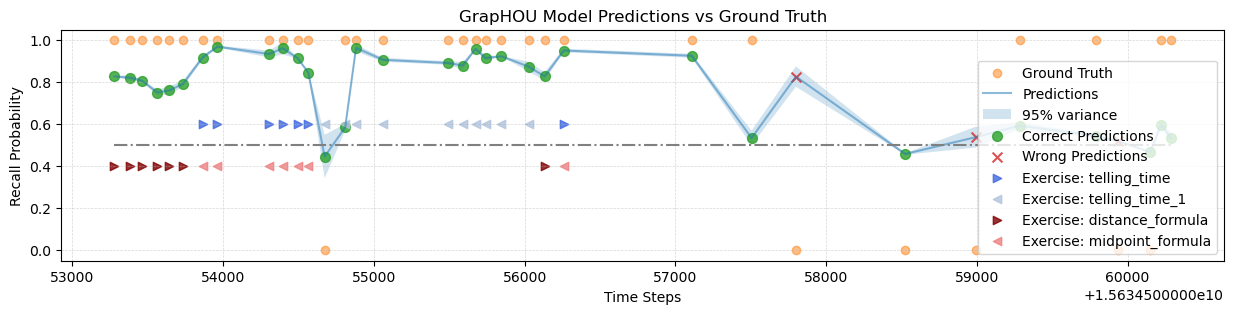

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Determine correct and wrong predictions
correct_indices = (test_pred >= 0.5) & (ground_truth == 1) | (test_pred < 0.5) & (ground_truth == 0)
wrong_indices = ~correct_indices

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 3))

# Plot ground-truth data
ax.scatter(time_steps, ground_truth, label='Ground Truth', color='tab:orange', alpha=0.5)
ax.plot(time_steps, test_pred, label='Predictions', color='tab:blue', alpha=0.5)
ax.fill_between(time_steps, test_pred+np.abs(std*20), test_pred-np.abs(std*20),label='95% variance',alpha=0.2)
      
# Plot correct predictions with a specific marker
ax.scatter(time_steps[correct_indices], test_pred[correct_indices], 
           label='Correct Predictions', color='tab:green', marker='o', alpha=0.8, s=50)
ax.scatter(time_steps[wrong_indices], test_pred[wrong_indices], 
           label='Wrong Predictions', color='tab:red', marker='x', alpha=0.8, s=50)

ax.hlines(y=0.5, xmin = np.min(time_steps), xmax = np.max(time_steps),
            colors = 'grey', linestyles='dashdot')


ax.scatter(time_steps[ind51], np.ones_like(time_steps[ind51])*0.6, label='Exercise: telling_time', color='royalblue', marker='>', alpha=0.8)
ax.scatter(time_steps[ind778], np.ones_like(time_steps[ind778])*0.6, label='Exercise: telling_time_1', color='lightsteelblue', marker='<', alpha=0.8)

ax.scatter(time_steps[ind665], np.ones_like(time_steps[ind665])*0.4, label='Exercise: distance_formula', color='maroon', marker='>', alpha=0.8)
ax.scatter(time_steps[ind51], np.ones_like(time_steps[ind51])*0.4, label='Exercise: midpoint_formula', color='lightcoral', marker='<', alpha=0.8)



# Set axis labels and title
ax.set_xlabel('Time Steps')
ax.set_ylabel('Recall Probability')
ax.set_title('GrapHOU Model Predictions vs Ground Truth')

# Add legend
ax.legend(loc='lower right')

# Add grid lines
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# Display the plot
plt.show()

fig.savefig('graphou_process.png')

In [152]:
np.where(wrong_indices)

(array([12, 26]),)

In [135]:
# exercise-id re-match
import pandas as pd
bath_path = '/mnt/qb/work/mlcolab/hzhou52/kt/junyi/'

exercise = pd.read_csv(bath_path+'junyi_Exercise_table.csv', encoding = "utf-8",low_memory=False) 

num_ex = len(exercise)

ex_new_id = pd.DataFrame(columns=['exercise_name', 'exercise_id', 'prerequisite_name', 'prerequisite_id'])
ex_new_id['exercise_name'] = exercise.name
ex_new_id['exercise_id'] = np.arange(len(exercise))
ex_new_id['prerequisite_name'] = exercise.prerequisites

for i in range(len(ex_new_id.prerequisite_name)):
    pre = ex_new_id['prerequisite_name'][i]
    ind = exercise.loc[exercise.name == pre].index
    if len(ind) == 0:
        ex_new_id.prerequisite_id[i] = np.nan
    else:
        ex_new_id.prerequisite_id[i] = ind[0]

/scratch_local/hzhou52-3181119/tmp/ipykernel_44477/2195618826.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_new_id.prerequisite_id[i] = ind[0]
/scratch_local/hzhou52-3181119/tmp/ipykernel_44477/2195618826.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_new_id.prerequisite_id[i] = np.nan


In [146]:
ex_new_id.iloc[16]

exercise_name        midpoint_formula
exercise_id                        16
prerequisite_name    distance_formula
prerequisite_id                   501
Name: 16, dtype: object

In [204]:
# 1exp_ngms/AmortizeHSSM
with open('model_dict.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [205]:
loaded_dict.keys()

dict_keys(['pred_y', 'pred_z', 'pred_s', 'mean_s', 'var_s', 'mean_z', 'var_z'])

In [206]:
loaded_dict['pred_s'].shape

torch.Size([50, 3696, 1, 3])

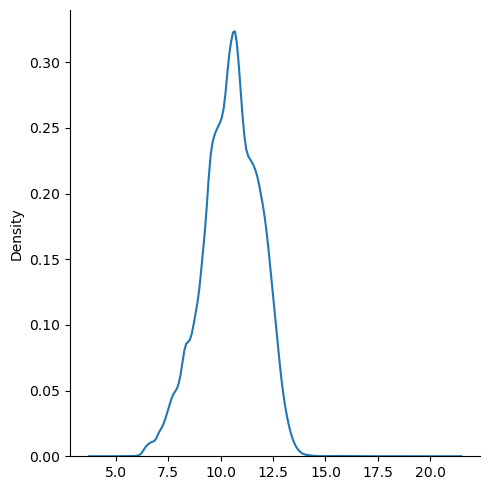

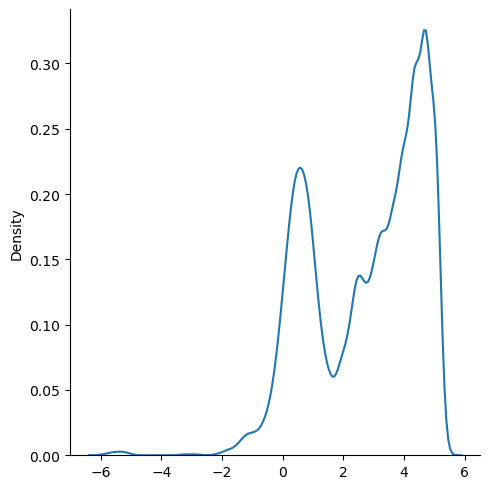

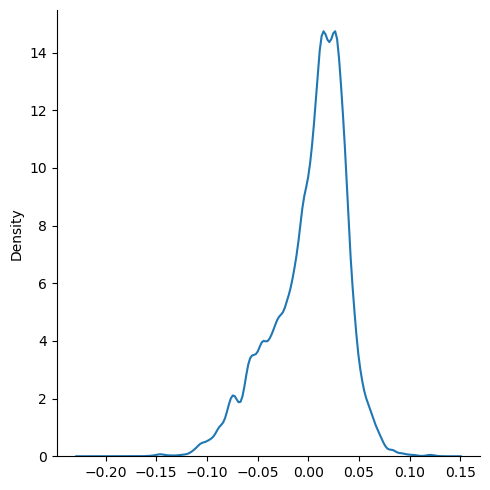

In [207]:
speed_hssm = loaded_dict['pred_s'][..., 0].reshape(-1).detach().cpu().numpy()
sns.displot(speed_hssm, kind='kde')

mean_hssm = loaded_dict['pred_s'][..., 1].reshape(-1).detach().cpu().numpy()
sns.displot(mean_hssm, kind='kde')

vola_hssm = loaded_dict['pred_s'][..., 2].reshape(-1).detach().cpu().numpy()
sns.displot(vola_hssm, kind='kde')

In [52]:
pred_y = loaded_dict['pred_y'].detach().cpu().numpy()
user_50 = pred_y[:, 50]
flat_pred_y = np.reshape(pred_y, (-1, 200, 1))

In [80]:
pred_y[:, 3059]

array([[[0.5000283 ],
        [0.9546072 ],
        [0.95423245],
        ...,
        [0.9544027 ],
        [0.9546435 ],
        [0.9543254 ]],

       [[0.4997036 ],
        [0.95541734],
        [0.95542896],
        ...,
        [0.9552552 ],
        [0.95545805],
        [0.95512086]],

       [[0.50088507],
        [0.9542987 ],
        [0.95397156],
        ...,
        [0.9539423 ],
        [0.9540854 ],
        [0.9541908 ]],

       ...,

       [[0.5003016 ],
        [0.9541067 ],
        [0.95426375],
        ...,
        [0.9538568 ],
        [0.9538824 ],
        [0.9539039 ]],

       [[0.49901062],
        [0.9551612 ],
        [0.95518637],
        ...,
        [0.95515895],
        [0.95523846],
        [0.9550273 ]],

       [[0.5000956 ],
        [0.95461994],
        [0.95448554],
        ...,
        [0.95459396],
        [0.95475256],
        [0.9542683 ]]], dtype=float32)

In [78]:
152912/50

3058.24

In [77]:
np.min(flat_pred_y[:,2:])

0.0025595387

In [76]:
np.where(flat_pred_y[:,1:] == np.min(flat_pred_y[:,1:]))

(array([152912]), array([141]), array([0]))

In [73]:
flat_pred_y[:,1:].shape

(184800, 199, 1)

In [71]:
pred_y.shape

(50, 3696, 200, 1)

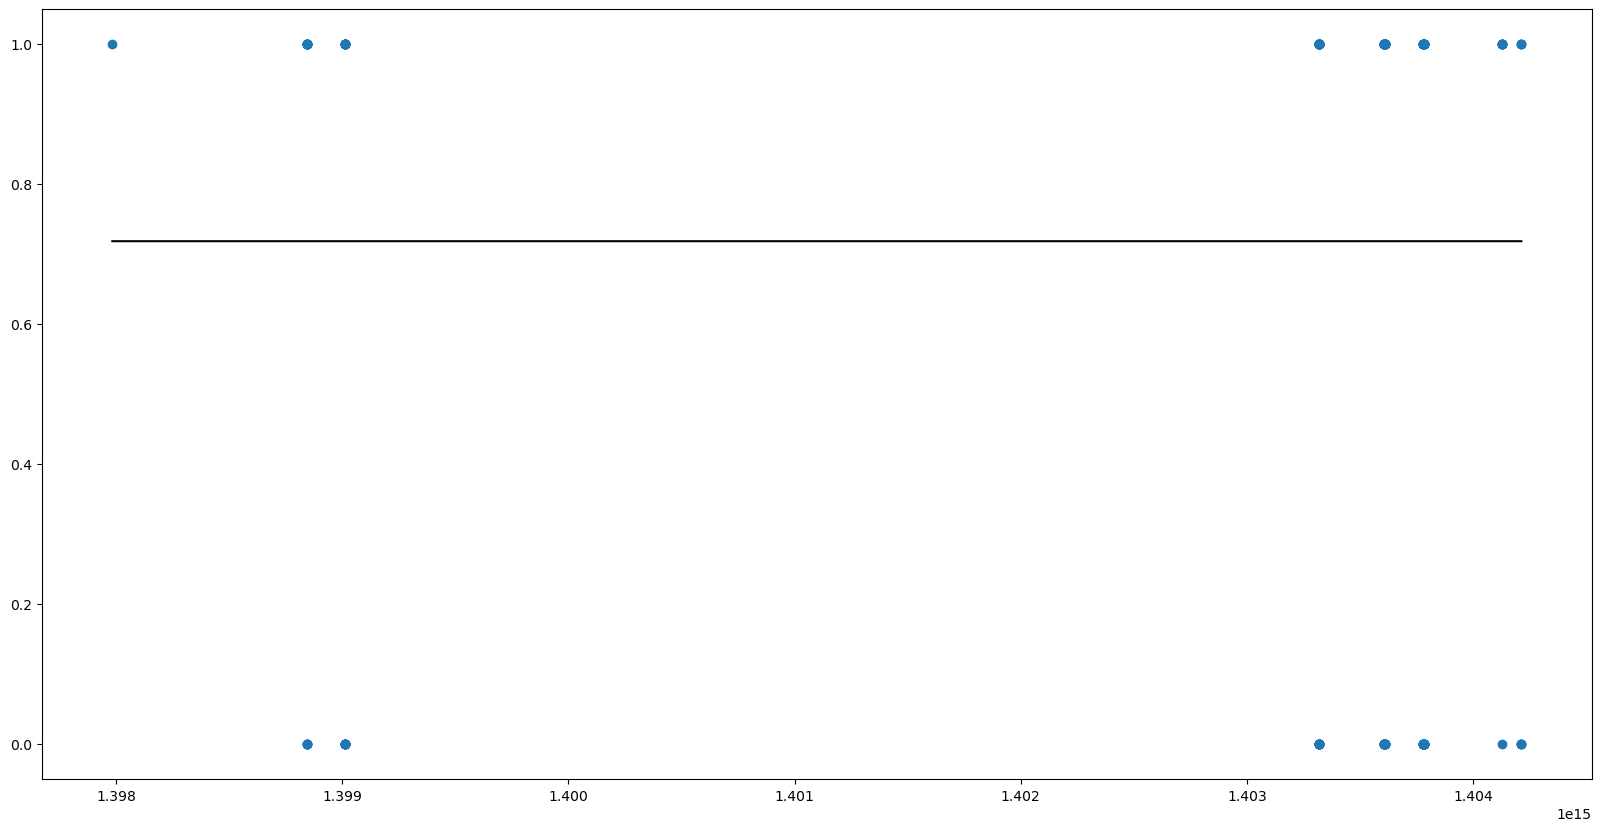

In [65]:
import matplotlib.pyplot as plt

user_id = 3695

time = corpus.user_seq_df.iloc[user_id]['time_seq'][1:]
errorbar = np.std(pred_y[:, user_id], 0)[1:,0]
y = np.mean(pred_y[:, user_id], 0)[1:,0]

plt.figure(figsize=(20,10))
plt.plot(time, y, 'k-')
plt.scatter(time, corpus.user_seq_df.iloc[user_id]['correct_seq'][1:])
plt.fill_between(time, y-errorbar, y+errorbar)
plt.ylim(-0.05, 1.05)


plt.show()

In [41]:
time = corpus.user_seq_df.iloc[50]['time_seq']
len(time)

200

In [78]:
import pickle
corpus_path = '/mnt/qb/work/mlcolab/hzhou52/kt/junyi/single_user_single_skill/Corpus_200.pkl'
with open(corpus_path, 'rb') as f:
    corpus = pickle.load(f)
# corpus.user_seq_df

ModuleNotFoundError: No module named 'data'

In [79]:
import torch
import numpy as np
import seaborn as sns

model_file = '/mnt/qb/work/mlcolab/hzhou52/kt/logs/0exp_ngss/OU/junyi/single_user_single_skill/2023-03-09T10:41:38.685090__overfit_0_epoch_100/Model/Model_76.pt'
state = torch.load(model_file)

In [16]:
speed = state['mean_rev_speed'].cpu().numpy()
mean = state['mean_rev_level'].cpu().numpy()
vola = state['vola'].cpu().numpy()

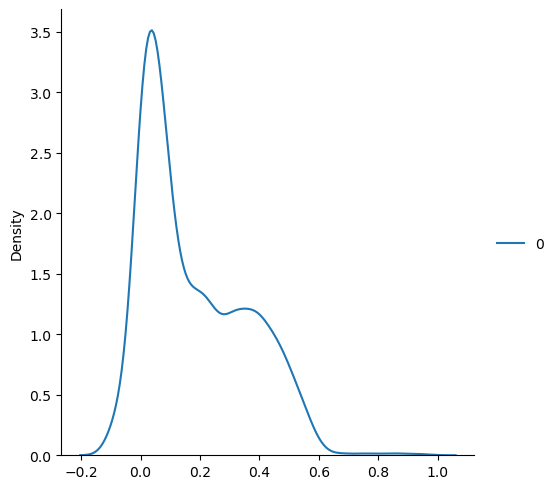

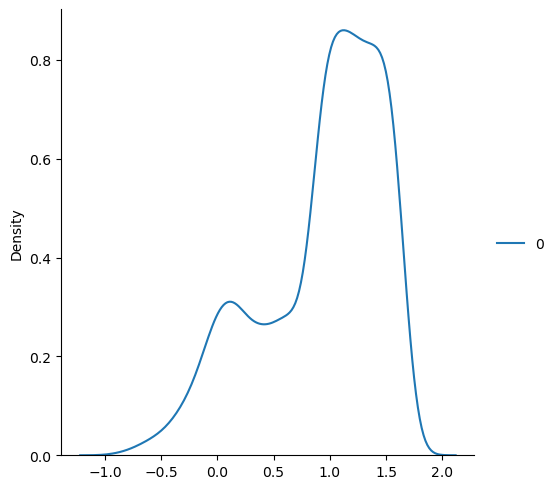

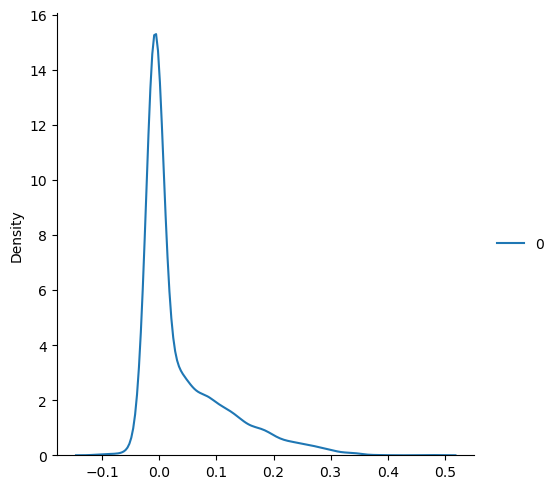

In [18]:
sns.displot(speed, kind="kde")
sns.displot(mean, kind='kde')
sns.displot(vola, kind='kde')

In [19]:
model_file = '/mnt/qb/work/mlcolab/hzhou52/kt/logs/2exp_gsm/VanillaOU/junyi/single_user_multi_skill/2023-03-13T15:56:49.662145__overfit_0/Model/Model_70.pt'
state = torch.load(model_file)

In [22]:
speed = state['mean_rev_speed'].cpu().numpy()[:,0]
mean = state['mean_rev_level'].cpu().numpy()[:,0]
vola = state['vola'].cpu().numpy()[:,0]

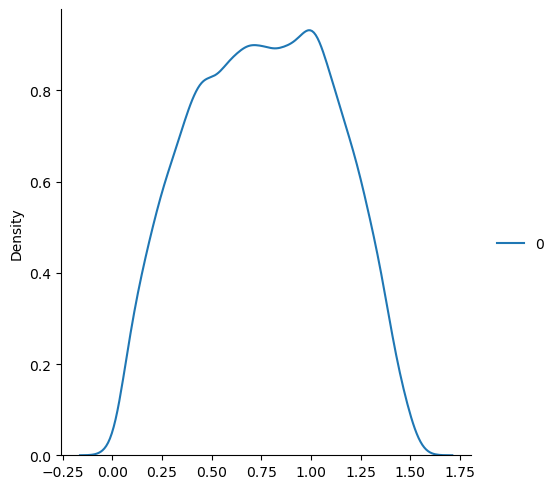

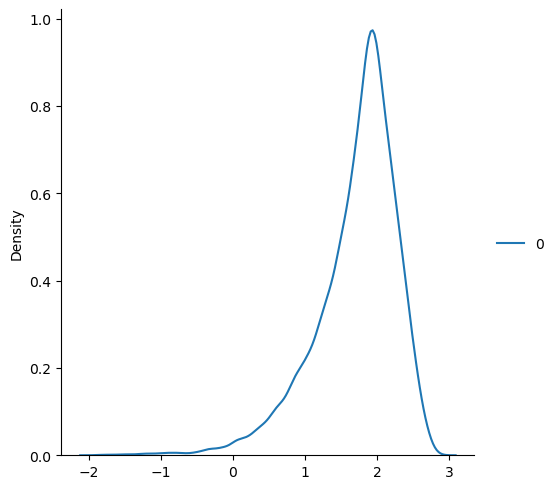

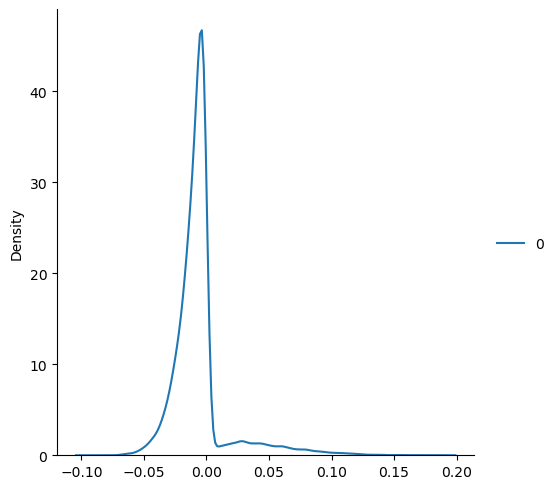

In [23]:
sns.displot(speed, kind="kde")
sns.displot(mean, kind='kde')
sns.displot(vola, kind='kde')

In [24]:
model_file = '/mnt/qb/work/mlcolab/hzhou52/kt/logs/2exp_gsm/GraphOU/2023-03-13T17:14:53.108027__overfit_0_mean_graph/Model/Model_40.pt'
state = torch.load(model_file)

In [30]:
speed = state['mean_rev_speed'].cpu().numpy()[:,0]
mean = state['mean_rev_level'].cpu().numpy()[:,0]
vola = state['vola'].cpu().numpy()[:,0]
gamma = state['gamma'].cpu().numpy()[:, 0]

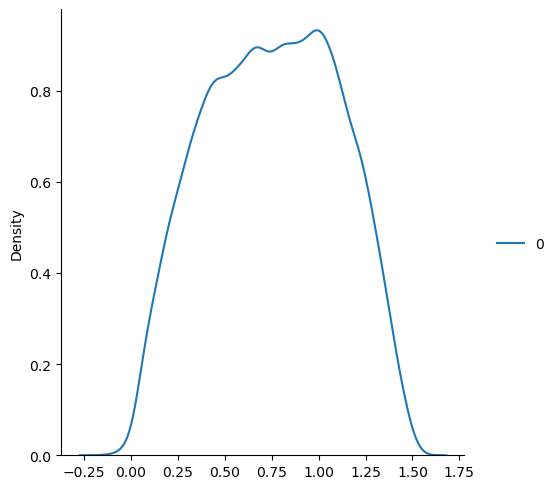

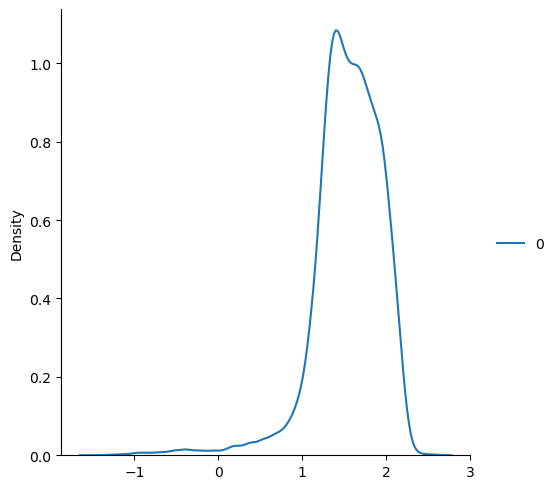

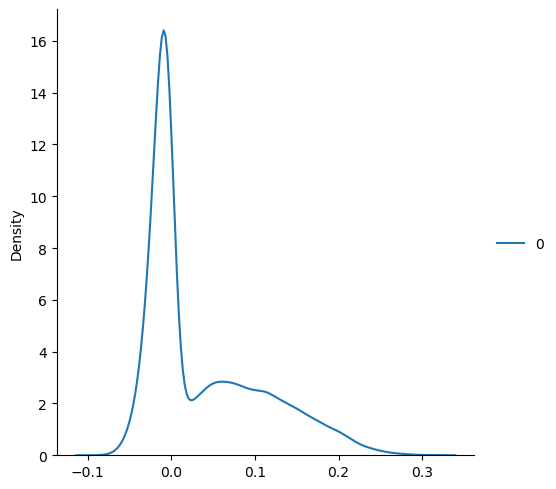

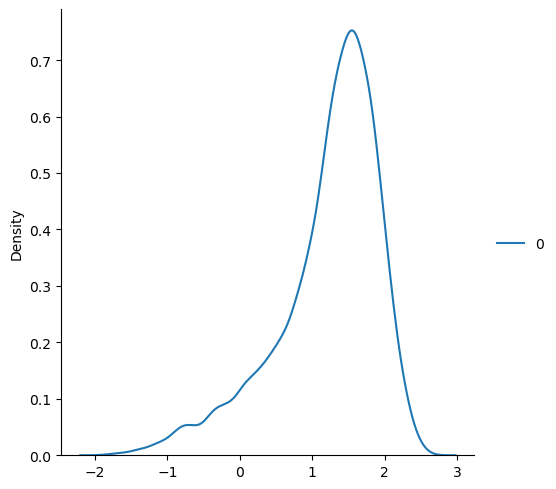

In [31]:
sns.displot(speed, kind="kde")
sns.displot(mean, kind='kde')
sns.displot(vola, kind='kde')
sns.displot(gamma, kind='kde')